# Introduction 



When travelling to other city or country accomaodation is what is the most important necessity.
The most important things in choosing an accomodation is the reservation price.
What are the main factors, which affect the reservation prices? 
Does time of the year influence prices and
What other factors affect the price. Locality , amenities , facilities, reviews or 
any other we try to analyse that using dataset of  publicly accessible AirBnB data,
available on Inside AirBnB and on Kaggle.

This Project analysises dataset of Seattle city close to Washington (US).


### Importing Packages required

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import folium
from folium import plugins
from folium.plugins import HeatMap

We have imported numpy ,pandas for basic data analysis.
Matplotlib anad seaborn for data visualization.
Folium for maps.

### Loading csv files and working on them.
##### 1) Getting a glimpse on datasets.
##### 2)Taking out relevant info on datatypes of columns.
##### 3)Counting the no of null values in each row
##### 4) Plotting the bar graph of no of null values in each column of all three datasets 
   ###### l_data which is a dataset on listings in Seattle city.
   ###### c_data which is a dataset on calendars info in Seattle City
   ###### r-data which is a datset on reviews info in Seattle City.

# Content
[Data Cleaning](http://)

In [4]:
r_data=pd.read_csv('../input/reviews.csv')
c_data=pd.read_csv('../input/calendar.csv')
l_data=pd.read_csv('../input/listings.csv')

In [5]:
r_data.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [6]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [7]:
r_data.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

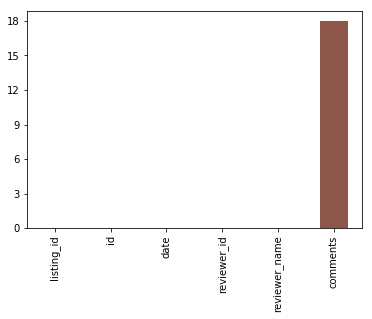

In [8]:
y=np.array([0,19])
plt.yticks(np.arange(y.min(), y.max(), 3))
r_data.isnull().sum().plot(kind='bar')

In [9]:
l_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [10]:
l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [11]:
l_data.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3.818000e+03,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3816.000000,3816.000000,3818,3816,3816,3818,3402,3818,3818,3818,3818,...,3812.000000,3817.000000,3818,3818,97.000000,3818,2009,1517,1866,2788,3818.000000,3818,3818.000000,3818.000000,3818,3818,3818.000000,3818.000000,3818.000000,3818.000000,3818,3818.000000,3191,3191,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,NaN,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,NaN,NaN,116,2,2,1442,81,87,17,7,2,...,NaN,NaN,5,3284,NaN,273,395,356,46,118,NaN,45,NaN,NaN,34,1,NaN,NaN,NaN,NaN,1,NaN,984,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/4121334,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a2.muscache.com/ac/pictures/47d84b2e-c...,https://a0.muscache.com/im/pictures/26221323/4...,https://a2.muscache.com/ac/pictures/ac14e3eb-1...,https://a1.muscache.com/ac/pictures/73725184/7...,NaN,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,...,NaN,NaN,Real Bed,{},NaN,$150.00,$500.00,"$2,500.00",$100.00,$50.00,NaN,$0.00,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2016-01-04,NaN,2015-09-21,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,39,32,1,1,1,1,NaN,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,NaN,NaN,595,3809,2997,30,351,397,794,3810,3817,...,NaN,NaN,3657,45,NaN,162,94,66,348,310,NaN,2048,NaN,NaN,706,3818,NaN,NaN,NaN,NaN,3818,NaN,25,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.578556e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.157757,7.157757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.307712,1.735394,NaN,NaN,854.618557,NaN,NaN,NaN,NaN,NaN,1.67260

In [12]:

l_data.isnull().sum()[l_data.isnull().sum().nonzero()[0]]


summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

In [13]:
l_data.isnull().sum()[l_data.isnull().sum().nonzero()[0]].index

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

In [14]:
type(l_data.isnull().sum()[l_data.isnull().sum().nonzero()[0]])

pandas.core.series.Series

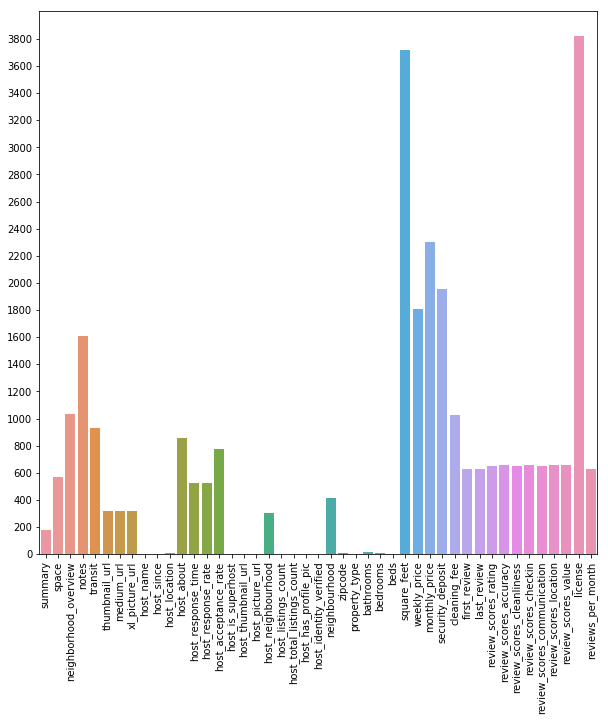

In [15]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=l_data.isnull().sum()[l_data.isnull().sum().nonzero()[0]].index,y=l_data.isnull().sum()[l_data.isnull().sum().nonzero()[0]].values)

In [16]:
c_data.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [17]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [18]:
c_data.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

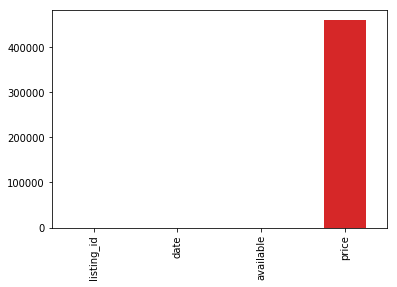

In [19]:
c_data.isnull().sum().plot(kind='bar')

###### After looking into datasets and counting the null values we move on to remove null value sfrom datasets .
###### We see that r_data's and c_data's each have one of there rows price and comments respectively with large no of datapoints missing
###### We remove the entire row from them.

###### And l_data's id is renamed to listing_id to facilitate easy understanding between the various datasets.


## Removing null values 

In [20]:

c_data.dropna(axis=0,subset=['price'],inplace=True)
r_data.dropna(axis=0,subset=['comments'],inplace=True)

In [21]:

l_data=l_data.rename(columns={'id':'listing_id'})

# Data Cleaning

In [22]:
l_data.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,

In [23]:
l_data['monthly_price'] = pd.to_numeric(l_data['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['price'] = pd.to_numeric(l_data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['weekly_price'] = pd.to_numeric(l_data['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['security_deposit'] = pd.to_numeric(l_data['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['cleaning_fee'] = pd.to_numeric(l_data['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['extra_people'] = pd.to_numeric(l_data['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
l_data['host_response_rate'] = pd.to_numeric(l_data['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
                                        ,errors='coerce')


In [24]:
l_data['host_since']=pd.to_datetime(l_data['host_since'])
l_data['month']=l_data.host_since.dt.month
l_data['year']=l_data.host_since.dt.year

In [25]:
cl_data=l_data.merge(c_data,on='listing_id')

In [26]:
c_data['date']=pd.to_datetime(c_data['date'])
c_data['month']=c_data.date.dt.month
c_data['year']=c_data.date.dt.year

In [27]:
c_data['price'] = pd.to_numeric(c_data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')

In [28]:
l_data2=l_data._get_numeric_data()
l_data2.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,month,year
0,241032,20160104002432,956883,96.0,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07,8.0,2011.0
1,953595,20160104002432,5177328,98.0,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48,2.0,2013.0
2,3308979,20160104002432,16708587,67.0,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15,6.0,2014.0
3,7421966,20160104002432,9851441,NaN,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,11.0,2013.0
4,278830,20160104002432,1452570,100.0,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89,11.0,2011.0


### Here we renamed various columns of l_data converted string types / object types to numeric .
### Similarily c_data is cleaned too.
### Unwanted symbols in columns are removed.


#  VISUALIZATION TO DRAW INFERENCES ON DATASET.

### USING HIST FUNCTION PLOTTING TOTAL NO OF LISTINGS IN PRICE RANGES.

(array([1.339e+03, 1.600e+03, 4.520e+02, 2.180e+02, 7.500e+01, 7.200e+01,
        2.400e+01, 1.200e+01, 1.200e+01, 1.000e+00, 4.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00]),
 array([  20.        ,   85.33333333,  150.66666667,  216.        ,
         281.33333333,  346.66666667,  412.        ,  477.33333333,
         542.66666667,  608.        ,  673.33333333,  738.66666667,
         804.        ,  869.33333333,  934.66666667, 1000.        ]),
 <a list of 15 Patch objects>)

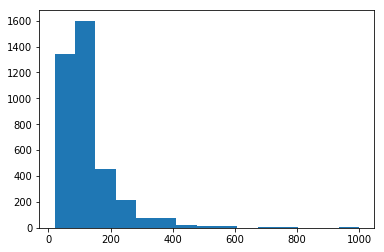

In [29]:
plt.hist(l_data['price'],bins=15)

#### We see that maximum no of listings are in price range from 0-200 dollars.

## Counting the total no of listing by location in Seattle city

In [30]:
l_data['neighbourhood_cleansed'].value_counts().head(15)

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Name: neighbourhood_cleansed, dtype: int64

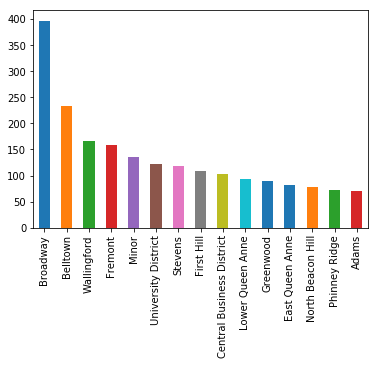

In [31]:
l_data['neighbourhood_cleansed'].value_counts().head(15).plot(kind='bar')

##### We see that Broadway Belttown has maximum no of listings.

# Using Maps To Analyse The Spread of Listings In Seattle City and 
# Relation of Neighbourhood with Price Plotted on MAP.

In [32]:
len(l_data2['latitude'])

3818

In [33]:
m = folium.Map(location=[47.60, -122.24], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             l_data2[['latitude', 'longitude']].iterrows()]

hh =  HeatMap(heat_data).add_to(m)

m



###### Heatmap of Seattle using folium shows the distribution of listings across the city . 


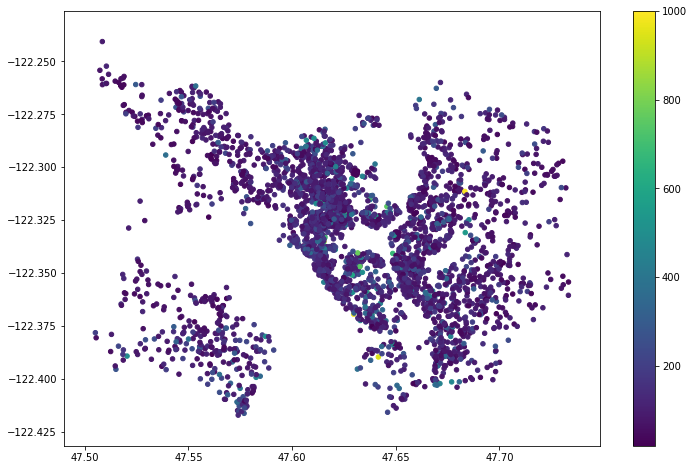

In [34]:
plt.figure(figsize=(12,8))
points = plt.scatter(l_data2['latitude'], l_data2['longitude'], c=l_data["price"], s=20, cmap="viridis") 
plt.colorbar(points)

### Price Distribution of listings  across latitudes and longitudes in Seattle city.
### which shows that maximum no of listings have price between 0 -200 dollars.
### Also the max no of listings having prices higher than 200 are certainly more in the center of City.

# Plotting Neighbourhood with price, room type ,property type to draw any possible conculsion

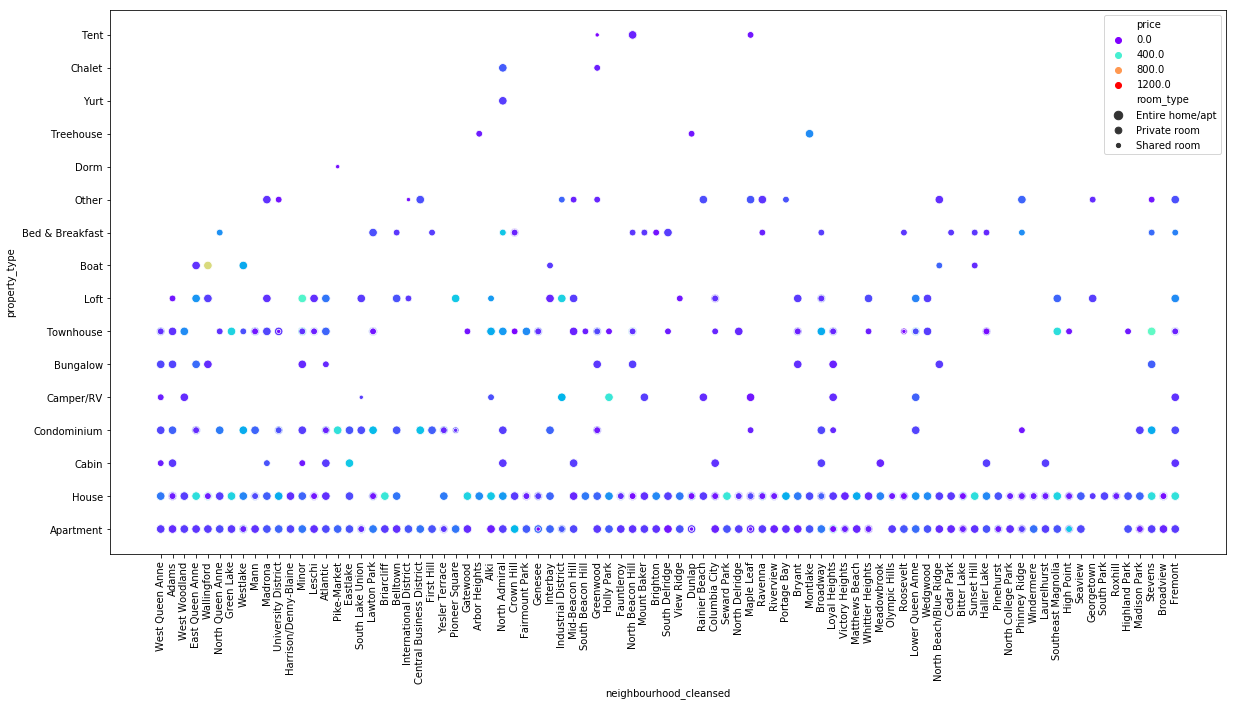

In [35]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='neighbourhood_cleansed',hue='price',size='room_type',y='property_type',palette='rainbow',data=l_data)

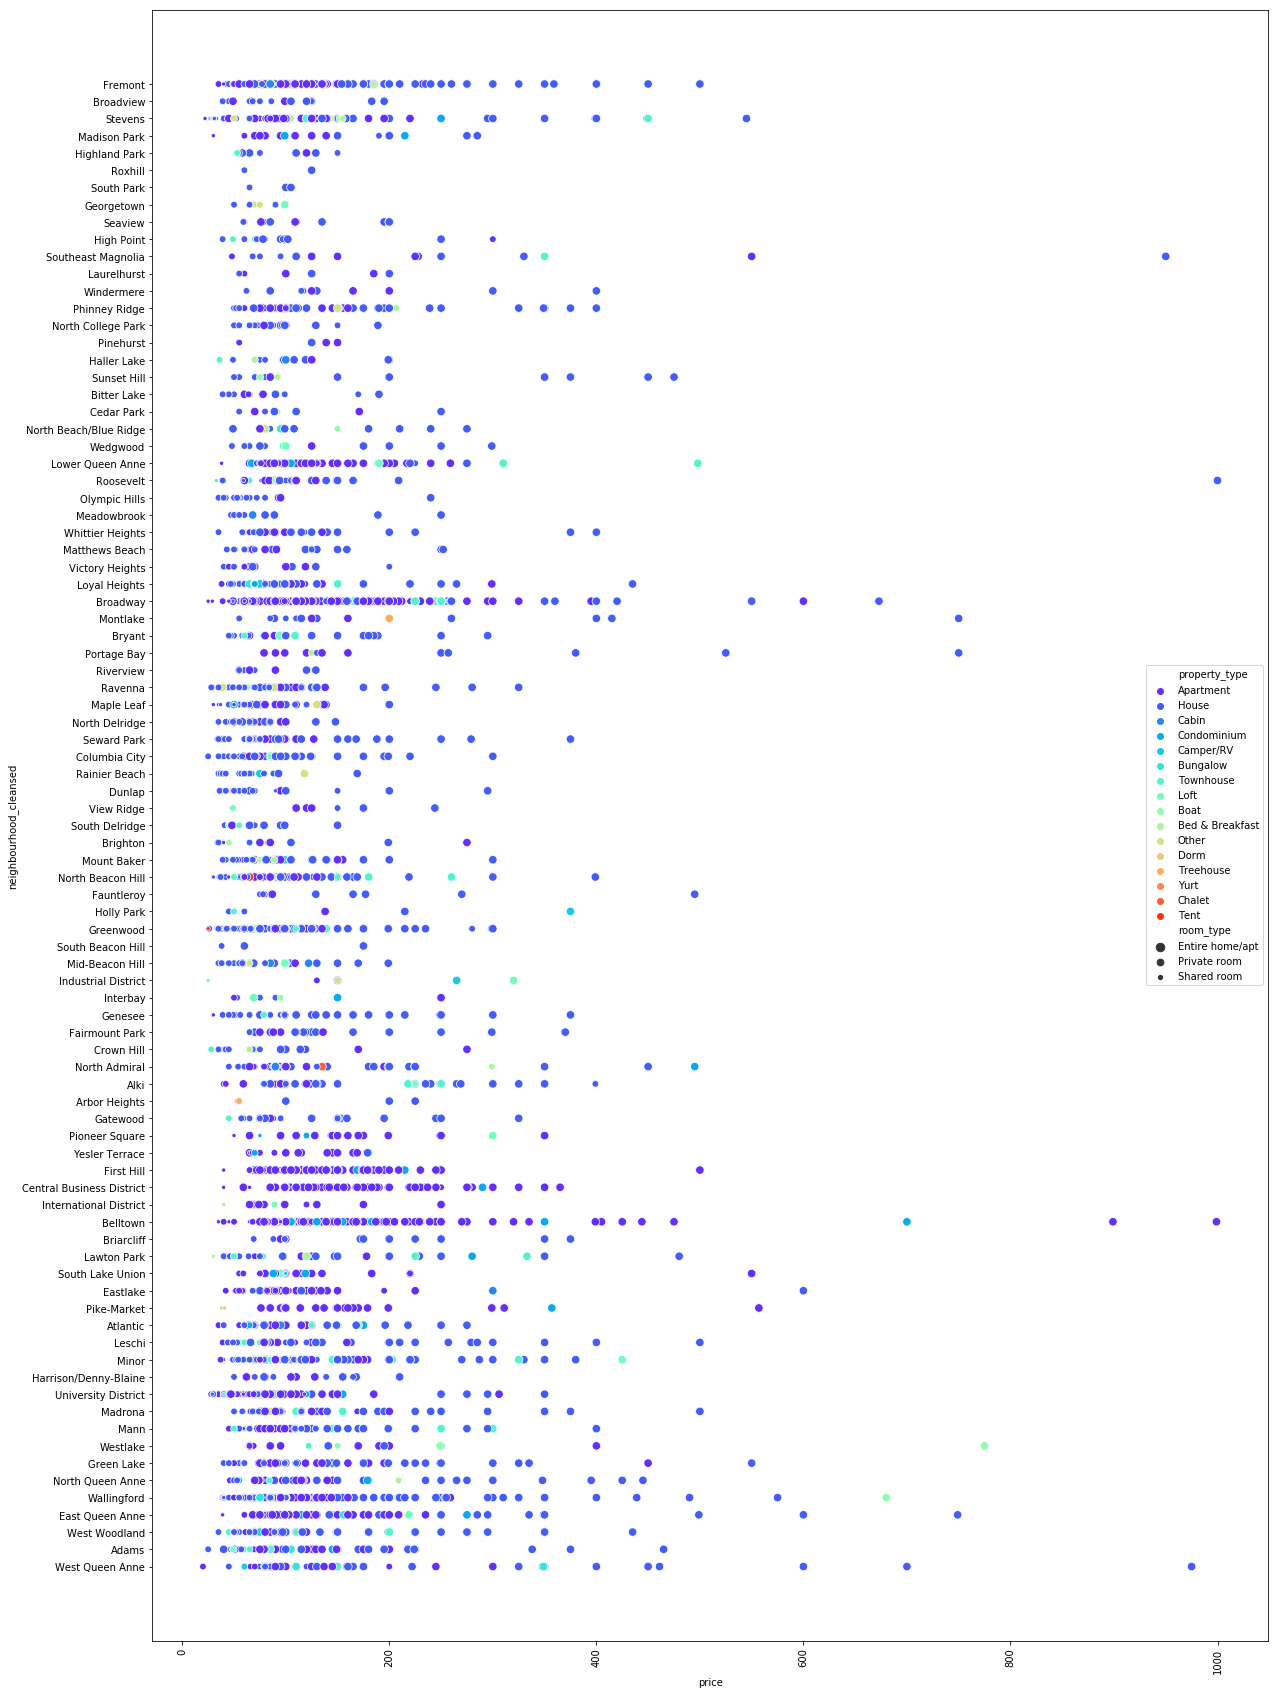

In [36]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',x='price',size='room_type',hue='property_type',palette='rainbow',data=l_data)

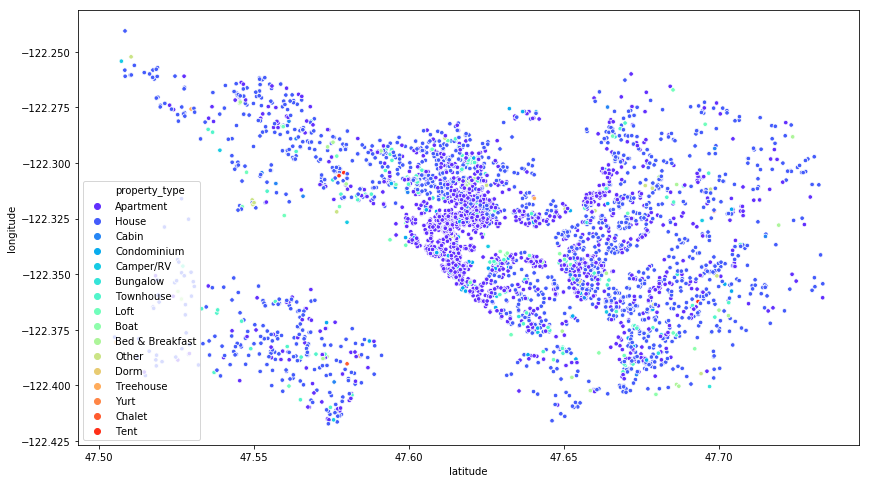

In [37]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=l_data2['latitude'], y=l_data2['longitude'], hue=l_data["property_type"], s=20, palette="rainbow") 


###### We see that maximum no of Apartment,House  are alloted as a whole . 
###### The Price range is between 0-200 inmost of the places.
###### The distribution of Listings like Bunglow,Townhouse,Loft is mostly more in
###### ratio at outskirts of city where possible tourist places .
###### But city center is predominatly apartments and houses.

## Working on host response time to draw ay conclusion.

In [38]:
l_data['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

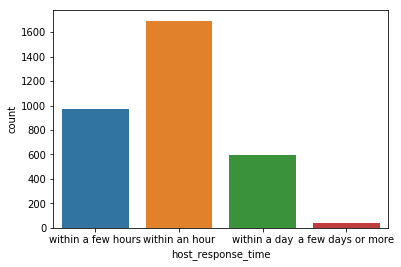

In [39]:
sns.countplot(l_data['host_response_time'])

##### We see that maximum hosts respond within an hour .

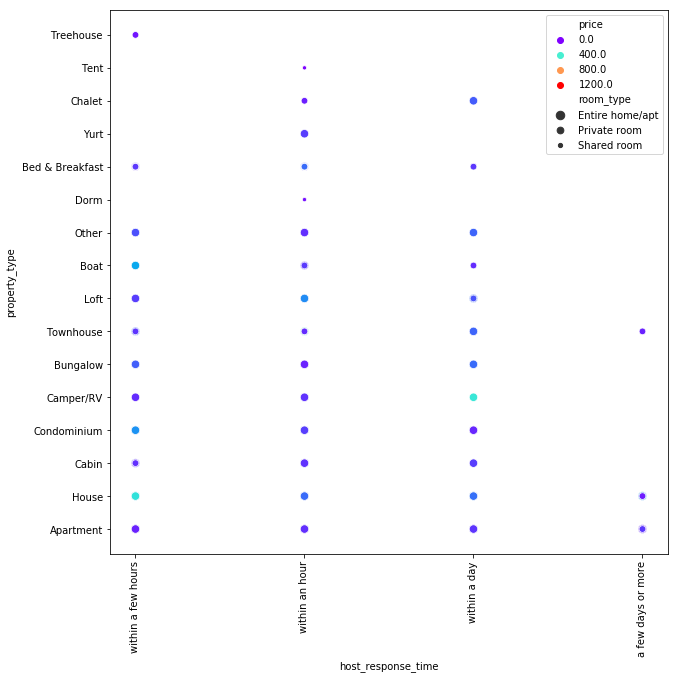

In [40]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='price',size='room_type',y='property_type',palette='rainbow',data=l_data)

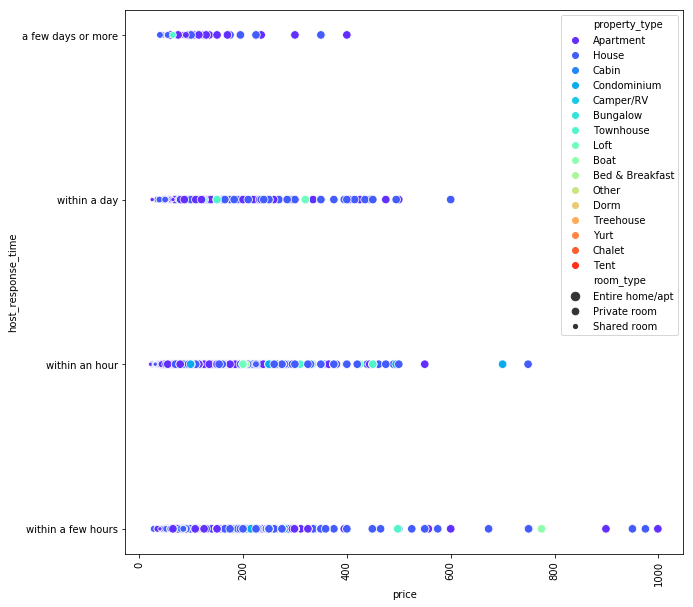

In [41]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(y='host_response_time',x='price',size='room_type',hue='property_type',palette='rainbow',data=l_data)

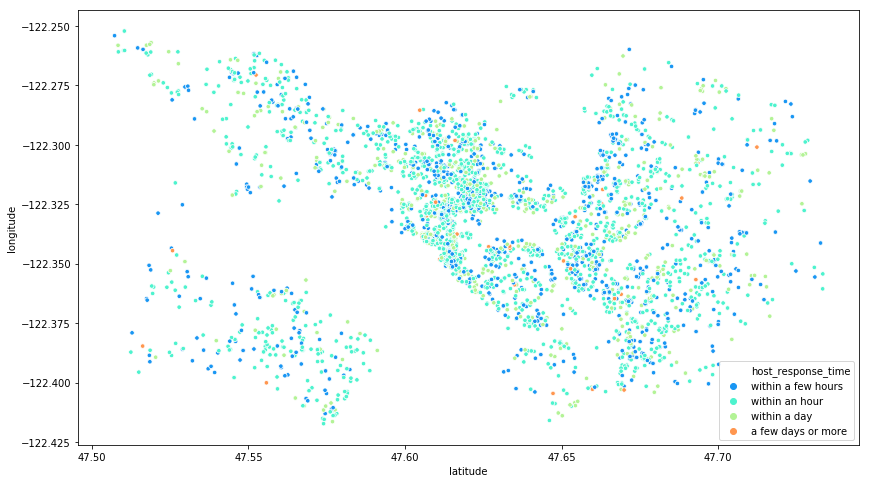

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=l_data2['latitude'], y=l_data2['longitude'], hue=l_data["host_response_time"], s=20, palette="rainbow") 


###### We see that response time varies a bit on the basis of property type .
###### But there no possible pattern with there variance with price or property type so this might mean that 
###### host response time is highly individual basis.
###### However we see that usually it takes within an hour in city center.
###### And within few days in outskirts of city.
###### This might mean with business planning which should be more planned in city center.

In [43]:
l_data['host_location'].value_counts().head(20)

Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
Bellevue, Washington, United States           12
San Francisco, California, United States      11
Mercer Island, Washington, United States      10
Kirkland, Washington, United States            8
New York, New York, United States              6
Seattle                                        5
Shoreline, Washington, United States           5
Vashon, Washington, United States              5
Sammamish, Washington, United States           5
San Diego, California, United States           4
Seattle, Washington                            4
Vancouver, Washington, United States           4
Tucson, Arizona, United States                 4
Portland, Oregon, United States                4
Vancouver, British Columbia, Canada            3
Name: host_location,

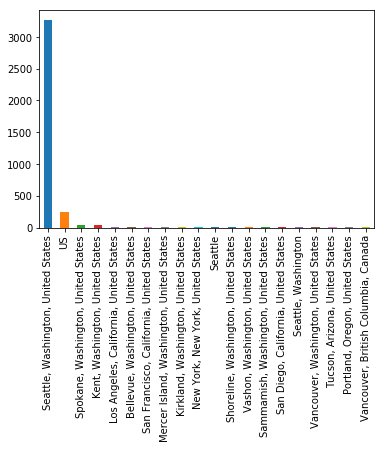

In [44]:
l_data['host_location'].value_counts().head(20).plot(kind='bar')

###### We see that most of the host locations are in Seattle and other hosts are mostly from nearby places Washington And  California.

In [45]:
l_data.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

In [46]:
l_data['host_response_rate'].value_counts()

100.0    2371
90.0      165
80.0      104
99.0       78
88.0       66
50.0       52
94.0       46
67.0       41
75.0       32
89.0       32
86.0       30
98.0       28
96.0       28
70.0       25
97.0       21
60.0       20
83.0       20
92.0       18
93.0       18
33.0       14
40.0       12
63.0       11
71.0        8
95.0        8
78.0        8
91.0        5
43.0        4
76.0        3
25.0        3
64.0        3
87.0        3
17.0        2
82.0        2
57.0        2
58.0        2
31.0        1
55.0        1
81.0        1
56.0        1
53.0        1
38.0        1
30.0        1
68.0        1
69.0        1
65.0        1
Name: host_response_rate, dtype: int64

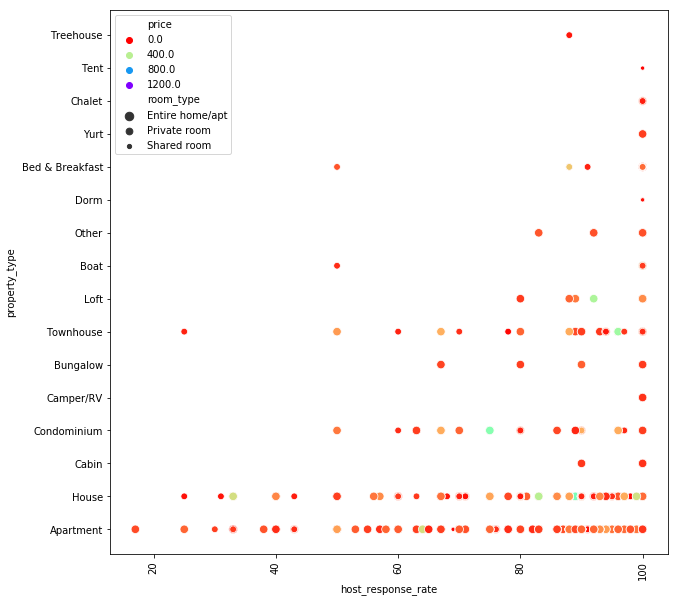

In [47]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_rate',hue='price',size='room_type',y='property_type',palette='rainbow_r',data=l_data)

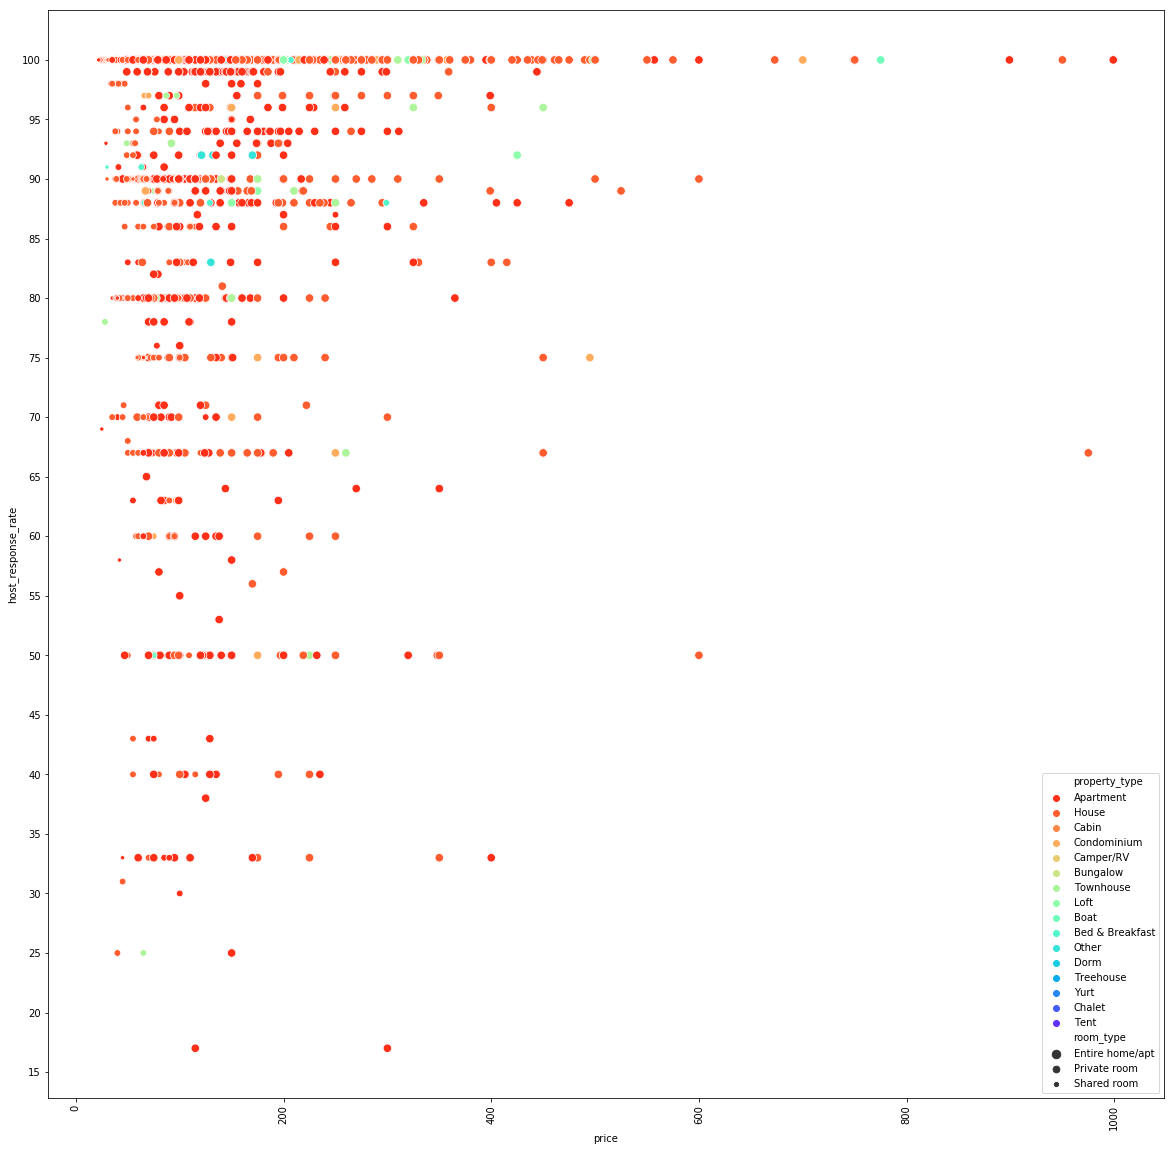

In [48]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='host_response_rate',x='price',size='room_type',hue='property_type',palette='rainbow_r',data=l_data)

###### The Host Response rate is mostly 100 % for 90% of the listings.
###### House and Apartments have response rate of around 100 % .
###### While distribution of Loft,Boat,Bunglow,Townhouse is mostly between 90 - 95 %

## Plotting no of property type and room type

In [49]:
l_data['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

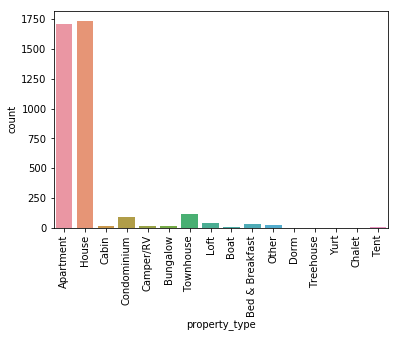

In [50]:
plt.xticks(rotation=90)
sns.countplot(l_data['property_type'])

In [51]:
l_data['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

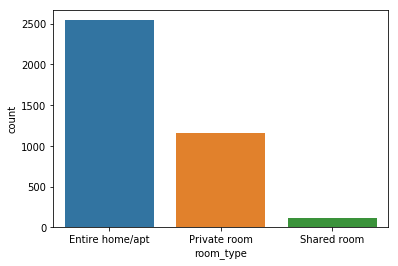

In [52]:
sns.countplot(l_data['room_type'])

####  We see that maximum no of properties are Apartments and houses followed by sighnifigantly low Townhouse and Condominium  . This also show the type of property in Seattle City. 
##### We see that maximim no of listings are for Entire Rooms / Apartments.

## Analysing Review's of listings

##### We get  into analysis Reviews for possible individuals visiting Seattle.

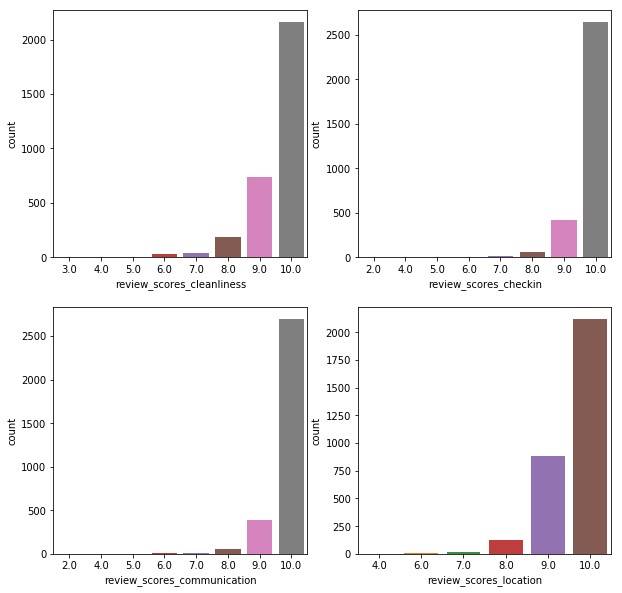

In [53]:
fig,axes= plt.subplots(nrows=2, ncols= 2,figsize=(10,10))



sns.countplot(l_data['review_scores_cleanliness'],ax=axes[0][0])

sns.countplot(l_data['review_scores_checkin'],ax=axes[0][1])

sns.countplot(l_data['review_scores_communication'],ax=axes[1][0])

sns.countplot(l_data['review_scores_location'],ax=axes[1][1])


#####  We see that most of the reviews are in between 9 -10 so this means that selecting a listing with review scores less than 9 is not right .
##### and anything less than 8 is not acceptable at all.
      


# Superhost features and counting no of listings which are superhosts

At Airbnb you can get the status "Superhost". From Airbnb:

As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
    Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year.
    Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays.
    Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
    Superhosts respond to 90% of new messages within 24 hours.

Below, we can see that only a small po

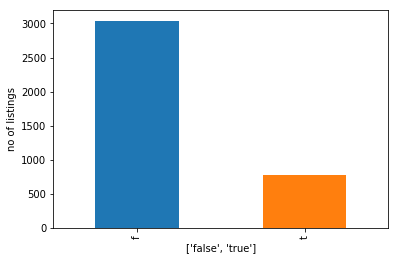

In [54]:
plt.xlabel(['false','true'])

plt.ylabel('no of listings')

l_data['host_is_superhost'].value_counts().plot(kind='bar')


Very few listings are superhost aroung 17% this would mean that it's not so easier to get this title from AirBnB.

## Whether a listing is instant bookable or not

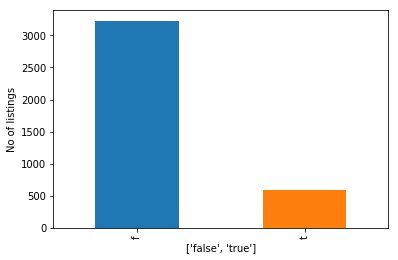

In [55]:
plt.xlabel(['false','true'])

plt.ylabel('No of listings')

l_data['instant_bookable'].value_counts().plot(kind='bar')


###### We see very few listings are instantly bookable around 16% of the total.

## cancellation policy of listings

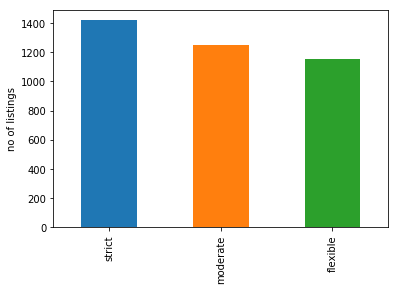

In [56]:


plt.ylabel('no of listings')

l_data['cancellation_policy'].value_counts().plot(kind='bar')


###### Cancellation property is usually  equally distributed in strict ,moderate and flexible with a gap of 200.

##  Availability over 90 days vs cancellation policy instant bookable and host is superhost or not

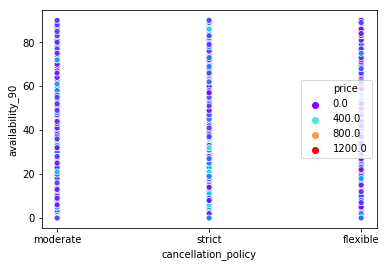

In [57]:



sns.scatterplot(hue=l_data['price'],x=l_data['cancellation_policy'],y=l_data['availability_90'],palette='rainbow')





###### Availability is not affected by cacellation policy as we see  similiar disrtribution of availability with canacellation policy and price.

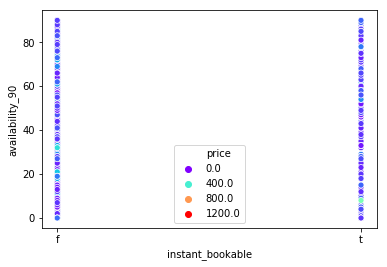

In [58]:
sns.scatterplot(hue=l_data['price'],x=l_data['instant_bookable'],y=l_data['availability_90'],palette='rainbow')




###### Availability is not affected by instant booking policy as we see similiar disrtribution of availability with instant booking policy and price.
###### So this might be the reason why so few listings offer this feature.

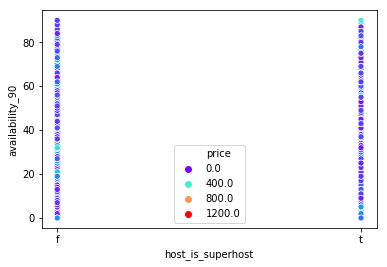

In [59]:

sns.scatterplot(hue=l_data['price'],x=l_data['host_is_superhost'],y=l_data['availability_90'],palette='rainbow')


###### Though we see that availability is affected in negative by superhost feature usually listings with higher prices are less available when it is a superhost.

## Security checkings done of customers entering listings

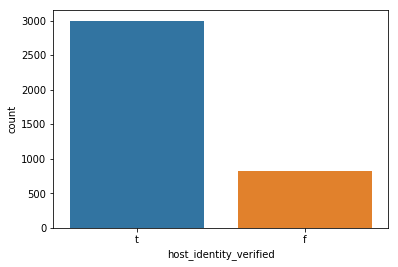

In [60]:
sns.countplot(l_data['host_identity_verified'])

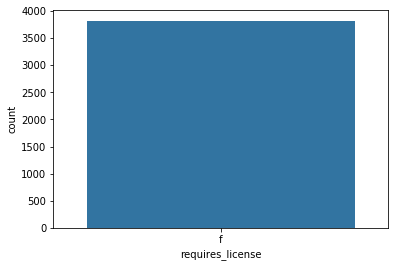

In [61]:
sns.countplot(l_data['requires_license'])

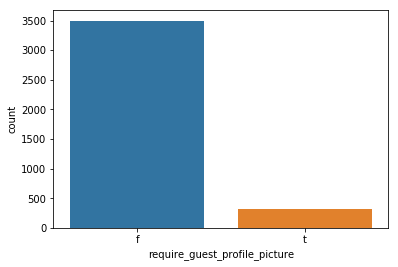

In [62]:
sns.countplot(l_data['require_guest_profile_picture'])

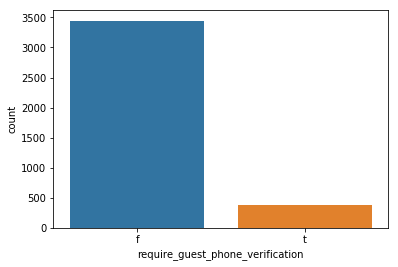

In [63]:
sns.countplot(l_data['require_guest_phone_verification'])

######  The security checking lefts lot more to be desired . So this area needs to be improved. And Municipal Corporations should look into this.

# Finding correlation between avaibility over month year and quauter with price room type property type bed bedroom no and rating using heatmaps and corr function

In [64]:
l_data_ay=l_data.sort_values('availability_365')

In [65]:
l_data.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',

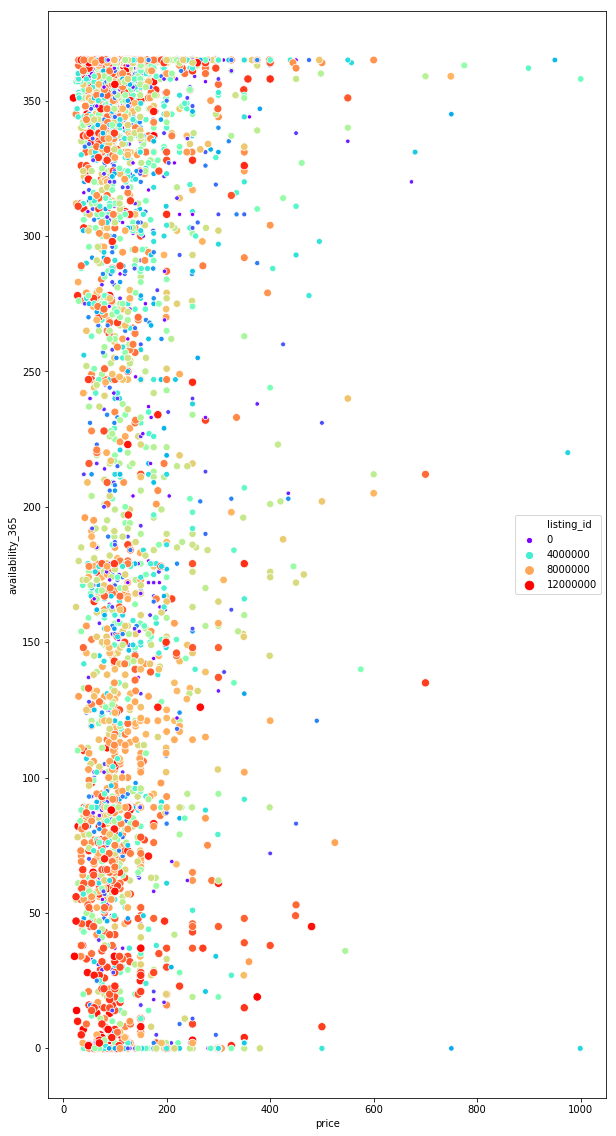

In [66]:
plt.figure(figsize=(10,20))

sns.scatterplot(y='availability_365',x='price',data=l_data,hue='listing_id',palette='rainbow',size='listing_id')

In [67]:
l_data[['availability_365','availability_90','availability_60','availability_30','price','monthly_price','weekly_price','review_scores_value','review_scores_rating']].corr()

,availability_365,availability_90,availability_60,availability_30,price,monthly_price,weekly_price,review_scores_value,review_scores_rating
availability_365,1.000000,0.619355,0.572857,0.503881,-0.015550,-0.033554,-0.034907,-0.066565,-0.038600
availability_90,0.619355,1.000000,0.973353,0.875778,-0.058810,-0.007749,-0.059254,-0.077367,-0.038022
availability_60,0.572857,0.973353,1.000000,0.936122,-0.049336,0.013794,-0.045516,-0.083797,-0.048460
availability_30,0.503881,0.875778,0.936122,1.000000,-0.037653,0.031131,-0.028811,-0.091919,-0.051439
price,-0.015550,-0.058810,-0.049336,-0.037653,1.000000,0.873450,0.937861,-0.041776,0.055551
monthly_price,-0.033554,-0.007749,0.013794,0.031131,0.873450,1.000000,0.942644,-0.057232,0.048595
weekly_price,-0.034907,-0.059254,-0.045516,-0.028811,0.937861,0.942644,1.000000,-0.077420,0.045262
review_scores_value,-0.066565,-0.077367,-0.083797,-0.091919,-0.041776,-0.057232,-0.077420,1.000000,0.696534
review_scores_rating,-0.038600,-0.038022,-0.048460,-0.051439,0.055551,0.048595,0.045262,0.696534,1.000000


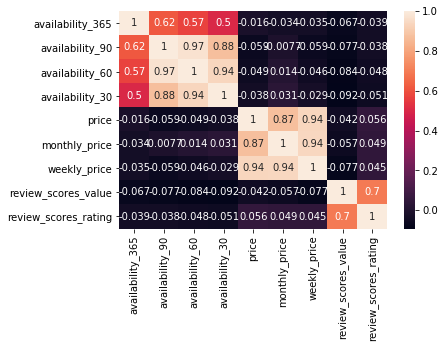

In [68]:
sns.heatmap(
    l_data[['availability_365','availability_90','availability_60','availability_30','price','monthly_price',
            'weekly_price','review_scores_value','review_scores_rating']].corr(),annot=True
)

###### There is very less relation of availibilty with reviews or price . While there seems to be slight realtion of price and ratings.

In [69]:
l_data[['availability_30','availability_60','availability_90','availability_365','property_type',
        'room_type','bathrooms','bedrooms','beds']].corr()


,availability_30,availability_60,availability_90,availability_365,bathrooms,bedrooms,beds
availability_30,1.000000,0.936122,0.875778,0.503881,-0.039447,-0.076559,-0.028571
availability_60,0.936122,1.000000,0.973353,0.572857,-0.049399,-0.090212,-0.036433
availability_90,0.875778,0.973353,1.000000,0.619355,-0.057346,-0.103121,-0.047570
availability_365,0.503881,0.572857,0.619355,1.000000,-0.002326,-0.049788,-0.009773
bathrooms,-0.039447,-0.049399,-0.057346,-0.002326,1.000000,0.610937,0.532838
bedrooms,-0.076559,-0.090212,-0.103121,-0.049788,0.610937,1.000000,0.753167
beds,-0.028571,-0.036433,-0.047570,-0.009773,0.532838,0.753167,1.000000


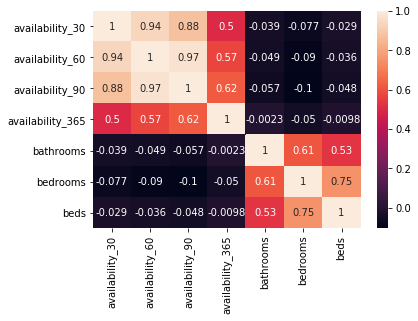

In [70]:
sns.heatmap(l_data[['availability_30','availability_60','availability_90',
                    'availability_365','property_type','room_type','bathrooms','bedrooms','beds']].corr(),annot=True)



###### No realtion of availabilty with property type or room type or with feature provided in the room.

In [71]:
l_data[['review_scores_rating','review_scores_value', 'property_type','room_type',
        'bathrooms','bedrooms','beds']].corr()


,review_scores_rating,review_scores_value,bathrooms,bedrooms,beds
review_scores_rating,1.000000,0.696534,0.045101,0.023257,-0.000720
review_scores_value,0.696534,1.000000,0.014297,-0.001208,-0.029102
bathrooms,0.045101,0.014297,1.000000,0.610937,0.532838
bedrooms,0.023257,-0.001208,0.610937,1.000000,0.753167
beds,-0.000720,-0.029102,0.532838,0.753167,1.000000


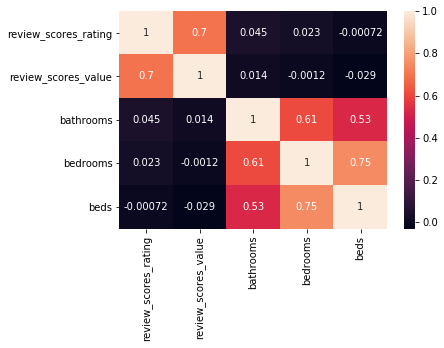

In [72]:
sns.heatmap(l_data[['review_scores_rating','review_scores_value', 'property_type',
                    'room_type','bathrooms','bedrooms','beds']].corr(),annot=True)


###### There is also not so siignificant relation between ratings and no of bed rooms and beds.

In [73]:
l_data.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,month,year
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,8.0,2011.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,2.0,2013.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a

## No of listings over the months in 2015

In [74]:

l_data[(l_data['year']==2015)]['month'].value_counts()

8.0     126
7.0     106
6.0      99
5.0      99
1.0      96
4.0      82
9.0      78
3.0      69
10.0     67
11.0     64
2.0      60
12.0     35
Name: month, dtype: int64

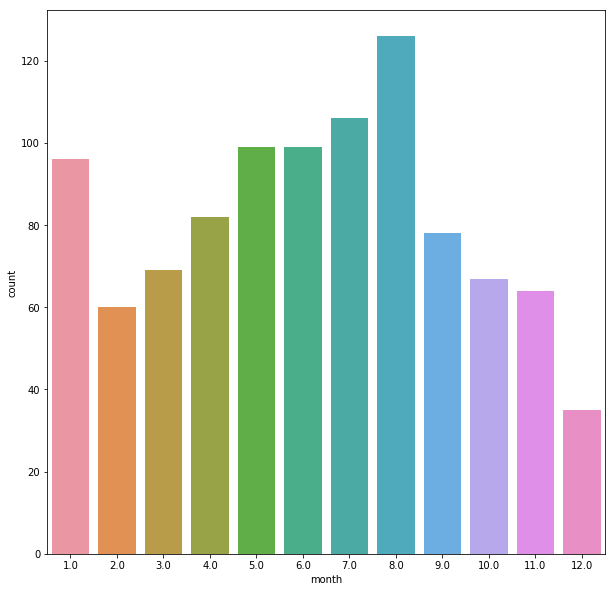

In [75]:

plt.figure(figsize=(10,10))
plt.ylabel('listings_count')
sns.countplot(l_data[(l_data['year'] == 2015)]['month'])

In the listings dataset we get that most of listings data is there for year 2015. So total no of listings in year 2015 is plotted. Which seems to be higher in months of june, july,august, then there is decrease in no of listings till december and then very significant rise in january. This might mean that october ,november,december are not busy months which coincides with time of heavy raiinfall in this area also.

 ## No of customers over the months of year 2016

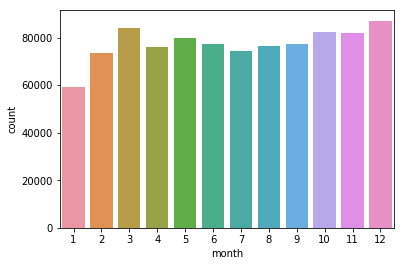

In [76]:
sns.countplot(c_data[(c_data['year'] == 2016)]['month'])

##### Again the customer data was available only for 2016 year where we see that no of customers in seattle is close to 60,000  - 80,000.
##### Throught the year 2016.

## Average price over the months of year 2015 from listings data 

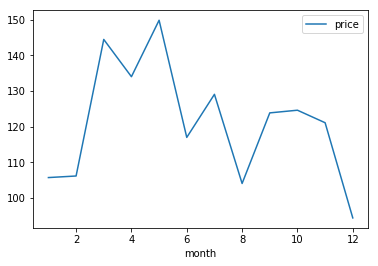

In [77]:
sns.lineplot(data=pd.pivot_table(data=l_data[(l_data['year'] == 2015)],index='month',values='price',aggfunc='mean'))


##### We see that there is drop in price of listings in 2015 in January ,June,July,August which coincides with larger no of listings in those months.

## Average price over the months in year 2016 from calendar data

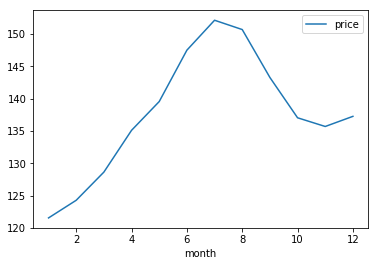

In [78]:
sns.lineplot(data=pd.pivot_table(data=c_data[(c_data['year']==2016)],index='month',values='price',aggfunc='mean'))

##### The price paid by customers in months between june to august is higher . Also the no of listings in 2015 and no of customers visiting in 2016 is also high.  So these months seem to be one of Tourist Attractions.
##### While incresed sales in December and Jan might be because prices are lower.

## Availibility over the months in 2015

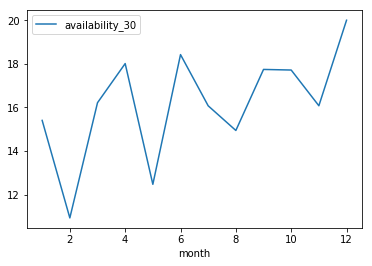

In [79]:
sns.lineplot(data=pd.pivot_table(data=l_data[(l_data['year'] == 2015)],index='month',values='availability_30',aggfunc='mean'))

## Applying KNN On Dataset

K Nearest Neighbors is a simple algorithm that uses all available cases and use those to predict for new and unseen cases used.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

In [80]:
#Extracting all numeric columns in dataset
l_data1=l_data._get_numeric_data()
l_data1.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,month,year
0,241032,20160104002432,956883,96.0,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07,8.0,2011.0
1,953595,20160104002432,5177328,98.0,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48,2.0,2013.0
2,3308979,20160104002432,16708587,67.0,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15,6.0,2014.0
3,7421966,20160104002432,9851441,NaN,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,11.0,2013.0
4,278830,20160104002432,1452570,100.0,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89,11.0,2011.0


In [81]:
#Removing NaN values
l_data1=l_data1.drop(['square_feet','license'],axis=1)
l_data1=l_data1.dropna(axis=0)

In [82]:
l_data1=l_data1.drop(['latitude','longitude'],axis=1)

In [83]:
#Ready Data for Use
l_data1.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,month,year
1,953595,20160104002432,5177328,98.0,6.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,2.0,2013.0
9,2493658,20160104002432,5177328,98.0,6.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,365,6,19,49,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,6,1.55,2.0,2013.0
11,4454295,20160104002432,4606439,100.0,1.0,1.0,2,1.0,1.0,1.0,99.0,800.0,2000.0,500.0,150.0,1,0.0,3,1125,21,21,21,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,1,0.98,1.0,2013.0
12,3883392,20160104002432,19932967,100.0,1.0,1.0,4,1.0,2.0,3.0,245.0,1575.0,5800.0,300.0,95.0,1,0.0,3,14,30,60,90,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.92,8.0,2014.0
32,5978498,20160104002432,31037494,60.0,1.0,1.0,4,3.0,3.0,2.0,175.0,699.0,2388.0,200.0,80.0,1,0.0,4,120,0,0,9,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1,1.31,4.0,2015.0


Finding The Correlation helps us to Find The Variable dependence on the Target Variable.

In [84]:
l_data1.iloc[:,5:11].corr()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price
host_total_listings_count,1.000000,-0.176626,-0.124907,-0.149510,-0.183053,-0.015655
accommodates,-0.176626,1.000000,0.544817,0.742773,0.830499,0.624500
bathrooms,-0.124907,0.544817,1.000000,0.603602,0.507761,0.564460
bedrooms,-0.149510,0.742773,0.603602,1.000000,0.742577,0.623789
beds,-0.183053,0.830499,0.507761,0.742577,1.000000,0.558749
price,-0.015655,0.624500,0.564460,0.623789,0.558749,1.000000


For visual representation of variables we use "HeatMap"

HeatMap:
    
        A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.
        There can be many ways to display heat maps, but they all share one thing in common -- they use color to communicate relationships between data values that would be would be much harder to understand if presented numerically in a spreadsheet.

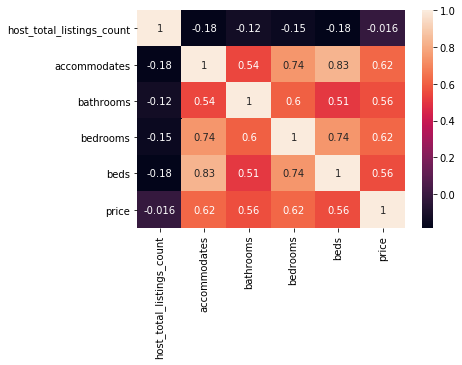

In [85]:
sns.heatmap(l_data1.iloc[:,5:11].corr(),annot=True)

PairPlot:
    
    Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.A Simple 2D plots is used to understand the relationship or pattern between two variables or dimensions in our dataset. 

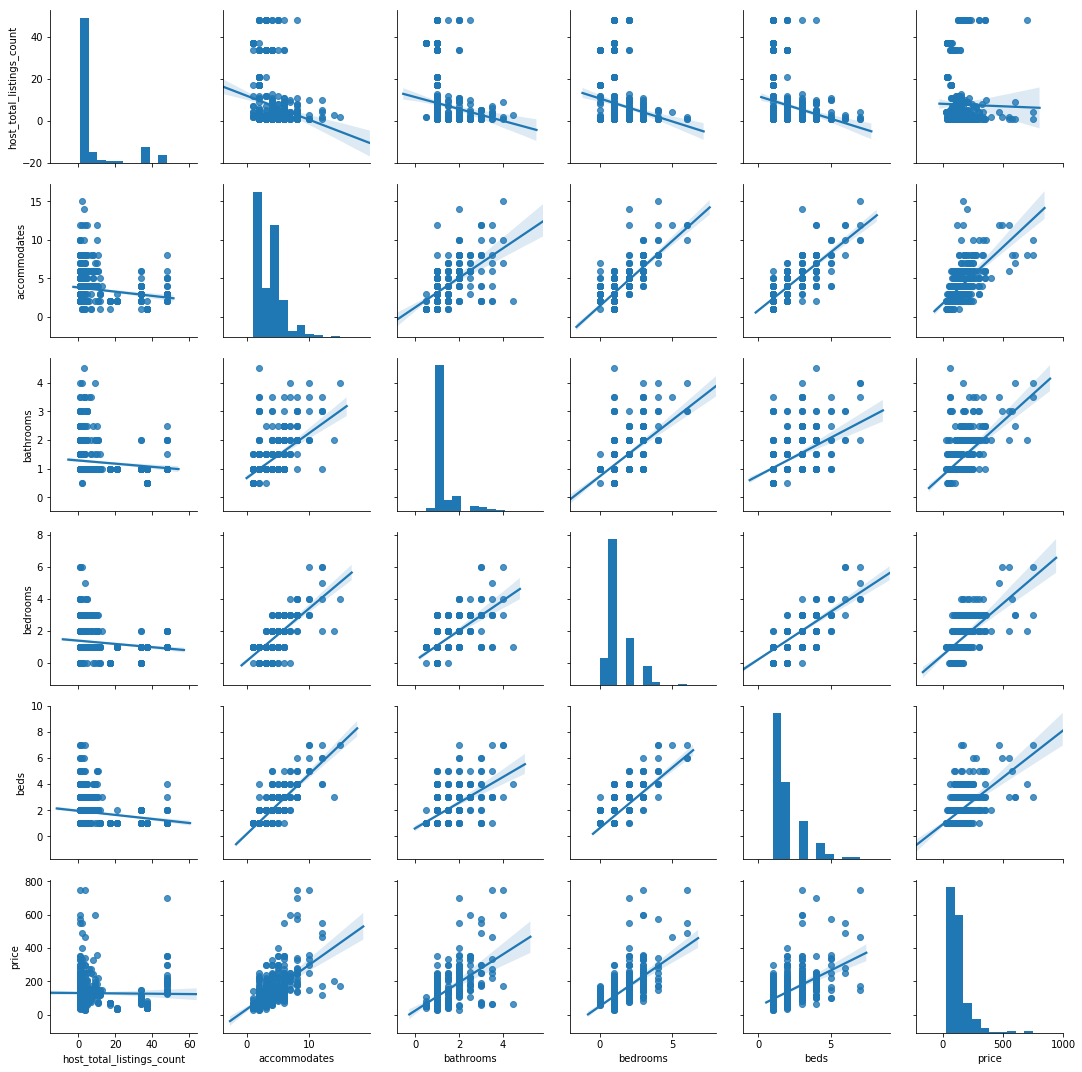

In [86]:
sns.pairplot(l_data1.iloc[:,5:11],kind='reg')

From The Above The PairPlot we understand the relationship between all the variables in our dataset used.

ScatterPlot:
    
    A scatterplot is a graph that is used to plot the data points for two variables. Each scatterplot has a horizontal axis (x-axis) and a vertical axis (y-axis).One variable is plotted on each axis. Scatterplots are made up of marks; each mark represents one study participant's measures on the variables that are on the x-axis and y-axis of the scatterplot.

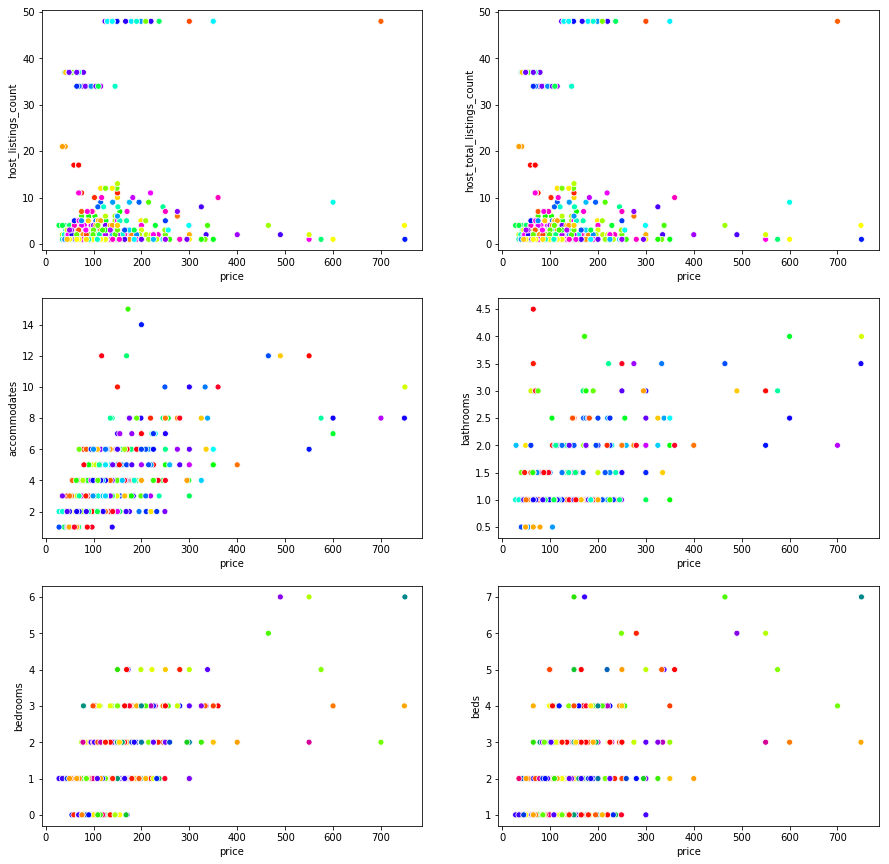

In [87]:
fig,axes= plt.subplots(nrows=3, ncols= 2,figsize=(15,15))
sns.scatterplot(y='host_listings_count',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[0][0],palette='gist_rainbow_r')
sns.scatterplot(y='host_total_listings_count',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[0][1],palette='gist_rainbow_r')
sns.scatterplot(y='accommodates',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[1][0],palette='gist_rainbow')
sns.scatterplot(y='bathrooms',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[1][1],palette='gist_rainbow')
sns.scatterplot(y='bedrooms',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[2][0],palette='prism')
sns.scatterplot(y='beds',x='price',data=l_data1,hue='listing_id',legend=False,ax=axes[2][1],palette='prism')
plt.show()

From The Above Scatter Plot We Get a Glimpse of the relationship between each variable used and the target("Price").

From KNN algo Steps:
1. We Divide the dataset into train and test. With test size of 40% of dataset.

In [88]:
from sklearn.model_selection import train_test_split
x=l_data1.iloc[:,5:10]
y=l_data1['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

2. We then use a trail value for K say 5.
3. Fit the model with the training data.
4. Predict The value using testing data of X.

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[166.  126.2  67.  120.6 166.   93.8  93.8  93.8 158.8 123.   65.8  45.8
 124.8  65.8  93.8 120.   77.2 245.4  92.2 136.8  93.8 137.6 185.   65.8
 135.6  64.6  54.2 123.  123.  139.2  93.4  67.   77.2  93.8  93.8 125.6
 215.2 144.4  94.2  77.2  92.2  37.  121.2 158.8 154.2 101.6 162.8  72.8
 158.8  88.2  45.8 111.  125.2 248.8  91.2  54.2 115.  263.8  77.2 182.8
  71.6 442.   93.4  93.8  77.2  77.2 170.6 136.8  93.8 140.  420.4 109.8
 101.  191.  121.2  65.8 115.   93.8 114.2 110.2 185.8 135.6 219.8 125.2
  45.8 199.2 109.8 110.2 123.  143.2  77.2 101.  191.  153.2 164.8 109.8
  77.2  93.8 219.8 139.2 175.6 143.2  77.2 164.6  83.2  69.  166.   67.
  77.2  67.   77.2 123.  135.8  92.2 120.6  93.8 150.8 119.8  77.2  62.2
  72.8 144.   77.2 137.6 123.4 125.4 133.6 135.6 101.  101.   54.2  93.8
 183.8  45.8 158.8  91.8 219.8  94.2  71.6  65.8 221.4 101.  123.  134.8
 219.8 123.  120.  121.2 153.6 158.8  88.2 158.8  45.8  93.8  77.2  77.2
 124.8 169.   71.6 166.  169.4  71.6  77.2 116.  135

5. We plot a distribution curve to have a look on how good our actual value relate to the predicted value.

Distribution Plot:
    
    The distribution plot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.
    The distribution plot visualizes the distribution of data.

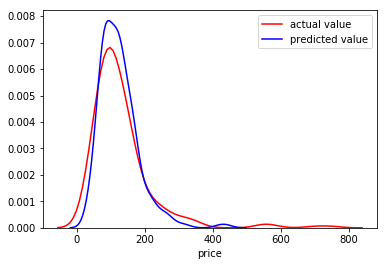

In [90]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

6. We find the optimal value of K for better prediction.
7. Calculate RMSE for finding the optimal value of K.

Root Mean Square Error:
    
    Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    pred1=knn.predict(x_train)
    error=sqrt(mean_squared_error(y_test,pred)) 
    error1=sqrt(mean_squared_error(y_train,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

RMSE test value for k=  1 is: 76.95939888987422 
RMSE train value for k is =  39.755859883314415
RMSE test value for k=  3 is: 70.11723913754908 
RMSE train value for k is =  48.42415760527509
RMSE test value for k=  5 is: 71.63389599449798 
RMSE train value for k is =  51.68689974198754
RMSE test value for k=  7 is: 70.37262606286166 
RMSE train value for k is =  53.54619229221355
RMSE test value for k=  9 is: 71.11067323819678 
RMSE train value for k is =  55.06479756712144
RMSE test value for k=  11 is: 71.04629463395229 
RMSE train value for k is =  56.314796732178955
RMSE test value for k=  13 is: 70.723077299731 
RMSE train value for k is =  56.938449452714586
RMSE test value for k=  15 is: 70.92990875307508 
RMSE train value for k is =  57.81358833254318
RMSE test value for k=  17 is: 71.902159514912 
RMSE train value for k is =  57.96376749761729
RMSE test value for k=  19 is: 73.46486489091171 
RMSE train value for k is =  59.16050278786682
RMSE test value for k=  21 is: 74.61

In [92]:
newList=list()
for x in mylist:
    newList.append(1/x)

8. Getting minimum RMSE for testing data. For optimal value of K.

In [93]:
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

Minimum R squared test error= 70.11723913754908
Minimum R squared train error= 39.755859883314415
Optimal K value=  3


9. Plotting graph between RMSE value and K value.

Text(0, 0.5, 'R squared test error')

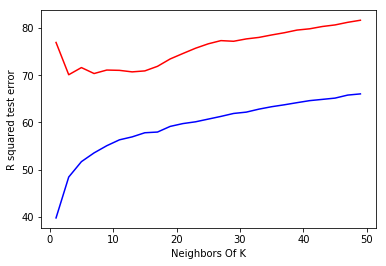

In [94]:
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

    From the above graph We can get the optimal value of K.

10. Plotting graph between RMSE value and 1/K value.

Text(0, 0.5, 'R squared test error')

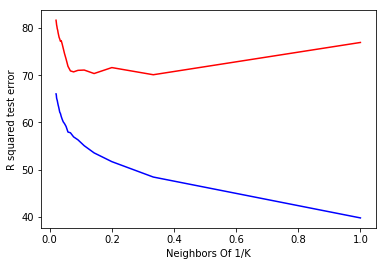

In [95]:
plt.plot(newList,rmse,color='red')
plt.plot(newList,rmse1,color='blue')
plt.xlabel('Neighbors Of 1/K')
plt.ylabel('R squared test error')

# Writing a Manual KNN Function

Steps:
1. Defining a Train Funtion.

In [96]:
def train(x_train,y_train):
    return

2. Defining a Predict Function.

    In this funtion we calculate the nearest distance and get the corresponding value for value of K and get nearest neighbors value means for more accuracy in predicted value.

In [97]:
def predic(x_train,y_train,x_test,k):
    distance=[]
    target=[]
    p=0
    for i in range(len(x_train)):
        dis=np.sqrt(np.sum(np.square(x_test-x_train.values[i])))
        distance.append([dis,y_train.values[i]])
        distance=sorted(distance)
    for i in range(k):
        p=p+distance[i][1]
    return(p/k)

3. Predicting the value for Target Variable for value of K.

In [98]:
ppp=[]
def KNN(x_train,y_train,x_test,pred,k):
    if k>len(x_train):
        raise ValueError
    
    train(x_train,y_train)
    for i in range(len(x_test)):
        print("K   ",k)
        print(x_test.iloc[i,:])
        p=predic(x_train,y_train,x_test.iloc[i,:],k)
        ppp.append(p)
        print("Predicted Price = $",p)
        

4. Finally Calling the above function by passing a certain value of K.And apply a try and except case beacuse the value of K cannot be larger then number of training values.

In [99]:
prediction=[]
try:
    KNN(x_train,y_train,x_test,prediction,3)
except ValueError:
    print("Value of K cannot be more then the number of training values")

K    3
host_total_listings_count    1.0
accommodates                 4.0
bathrooms                    1.0
bedrooms                     2.0
beds                         2.0
Name: 1866, dtype: float64
Predicted Price = $ 135.0
K    3
host_total_listings_count    8.0
accommodates                 5.0
bathrooms                    1.0
bedrooms                     1.0
beds                         3.0
Name: 1467, dtype: float64
Predicted Price = $ 137.0
K    3
host_total_listings_count    17.0
accommodates                  2.0
bathrooms                     1.0
bedrooms                      0.0
beds                          1.0
Name: 2716, dtype: float64
Predicted Price = $ 69.0
K    3
host_total_listings_count    2.0
accommodates                 2.0
bathrooms                    1.0
bedrooms                     0.0
beds                         1.0
Name: 3245, dtype: float64
Predicted Price = $ 132.66666666666666
K    3
host_total_listings_count    1.0
accommodates                 4.0
bathrooms 

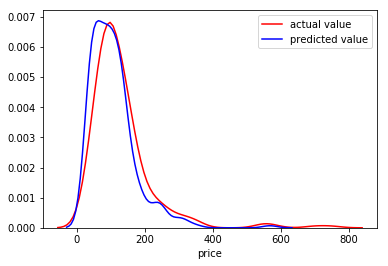

In [100]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(ppp,hist=False,color='blue',label='predicted value')

What Is Model Accuracy?

Model Accuracy is the measurement used to determine weather model is best at identifying relationships and patterns between variables in a dataset based on the training data. The better a model can generalize to ‘unseen or test' data, the better predictions and insights it produces that deliver more good value.

In the above graph we Examine Our Model Accuracy as by ploting a Distribution Curve of "Price" for Actual Value and the Predicted Value.

From the above graph we can conclude that our Predicted Value follow almost the same trend as Followed by Actual Value. As a result we can say that our Model Accuracy Is Somehow Good.

# Prediction using Linear Regression

Linear Regression is a Linear approch for modeling the relationship between Target Variable(Dependent Variable) and Other Variables(Independent Variable)    

Mathematically We Take Account Linear Regression as:-
    
        f(X)=β0 + β1X1 + β2X2 + ...+ βpXp
        
        Where,
            β0=Intercept
            β1,β2....,βp=Coefficients
            X1,X2....,Xp=Independent Variable

Value of Coefficients Defines how properlly the Independent Variables are Correlated to the Dependent Variable.
i.e., How much our funtion will get effected for one unit increase in the Dependent Variable With Respect To The Value Of Coefficient.

For Visual Analysis Of Linear Regression We Use "regplot()".

In [101]:
len(ppp)

271

In [102]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=l_data1.iloc[:,5:10]
y=l_data1[['price']]
Y=lm.fit(x,y)
lm.coef_
for i in range(len(x.columns)):
    print(x.columns[i],'\t ',lm.coef_[0][i])

host_total_listings_count 	  0.7233040031902218
accommodates 	  13.772827733054186
bathrooms 	  37.59999264104547
bedrooms 	  24.23338758623718
beds 	  -0.33599710381392534


Text(0, 0.5, 'Bathrooms and Bedrooms')

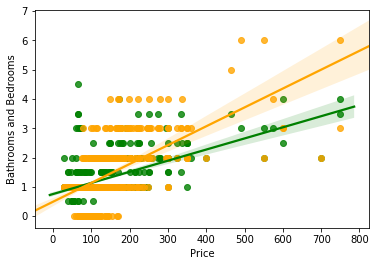

In [103]:
sns.regplot(y=l_data1['bathrooms'],x=l_data1['price'],color='green')
sns.regplot(y=l_data1['bedrooms'],x=l_data1['price'],color='orange')
plt.xlabel("Price")
plt.ylabel("Bathrooms and Bedrooms")

From The Above Regression Plot We Conclude that Bedroom(Orange Line) is more properly Correlated on comparision to Bathroom(Green Line) with Price, and the above Resultant Plot Dependence Is Due to The Coefficient Value of Of the two variables.

        As a result we find that Beadroom is the most important variable for predicting price in this case.

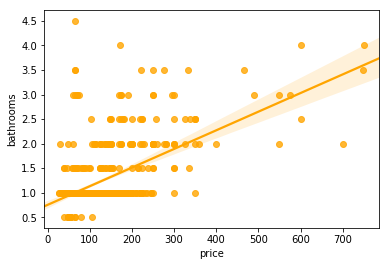

In [104]:

sns.regplot(y=l_data1['bathrooms'],x=l_data1['price'],color='orange')


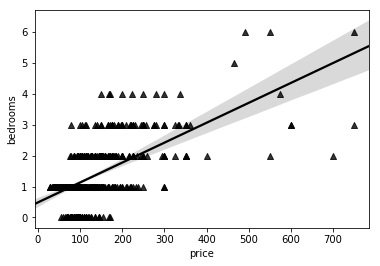

In [105]:
sns.regplot(y=l_data1['bedrooms'],x=l_data1['price'],color='black',marker='^')


# Result and Conclusion

We have predicted the possible price for listings using knn Algorithm.
analysis of price ratings availibility shows that there is dependence on location and property type a bit but the most significant one is no of bedroom and bathroom in price prediction .
The possible tourists attraction month seems to be May to August .
While prices are lower in December and January which also shows why there is larger no of tourists in these months also.
Also there are details of all these in significant detail in this project on AirBnB data of Seattle .